# TP 6- Intégration Numérique

Dans ce TP, on s'intéresse aux algorithmes permettant le calcul numérique d'intégrales. Il s'agit bien sûr de faire du calcul approché. Le principe général est de découper l'intervalle d'intégration en petits morçeau, et d'approcher sur chacun de ces petits intervalles la courbe représentative de $f$ par une courbe très simple pour laquelle le calcul d'aire est facile.

Dans un premier temps, on considère une fonction d'une seule variable $f(x)$ définie par: 
\begin{equation}\label{f}
f(x):=\begin{cases}\displaystyle\frac{\sin((k+0.5)x)}{\sin(0.5x)}, & \text{si }x\neq 0,\\
2k+1, & \text{si }x= 0,
\end{cases}
\end{equation}
sur l'intervalle $[0,\pi]$, pour $k=6, 10, 18$.


In [ ]:
import math
import numpy as np


def f(x):
    #à compléter


In [ ]:
def repartition_points(x_min,x_max,N_noeuds):
    """
    repartition de l'intervalle avec des points equidistants
    """
    val = np.zeros(N_noeuds)
    for i in range(0,N_noeuds):
        val[i] = x_min + (i*1.) * (x_max-x_min) / (N_noeuds-1.)
    return val


### Question 1
Calculer à la main l'intégrale de l'interpolation constante de $f$ au noeud $x_i$ sur un intervalle $[x_i,x_{i+1}]$. En utilisant cette formule, implémenter un algorithme pour calculer l'intégrale de l'interpolation constante par morceaux de $f$ à $N$ noeuds équidistants.
Cette méthode d'approximation numérique d'intégrale s'appelle méthode des rectangles. 


In [ ]:
def rectangle(noeuds,f):
    N=len(noeuds)
    I=0. 
    #à compléter
    return I

### Question 2
Calculer à la main l'intégrale de l'interpolation affine de $f$ aux noeuds $x_i, x_{i+1}$ sur un intervalle $[x_i,x_{i+1}]$. En utilisant cette formule, implémenter un algorithme pour calculer l'intégrale de l'interpolation affine par morceaux de $f$ à $N$ noeuds équidistants. Cette méthode d'approximation numérique d'intégrale s'appelle méthode des trapèzes.

In [ ]:
def trapeze(noeuds,f):
    N=len(noeuds)
    I=0. 
    #à compléter
    return I

### Question 3
Calculer à la main l'intégrale de l'interpolation de degré $2$ de $f$ aux noeuds $\displaystyle x_i, \frac{(x_i+x_{i+1})}{2}, x_{i+1}$ sur un intervalle $[x_i,x_{i+1}]$. En utilisant cette formule, implémenter un algorithme pour calculer l'intégrale de l'interpolation de degré $2$ par morceaux de $f$ à $N$ noeuds équidistants. Cette méthode d'approximation numérique d'intégrale s'appelle méthode de Simpson.


In [ ]:
def simpson(noeuds,f):
    N=len(noeuds)
    I=0.
    #à compléter
    return I

### Question 4
### 4.1
Utiliser ces trois méthodes pour approcher $\displaystyle \int_0^\pi f_1 dx$, où $ \displaystyle f_1=x \;sin x $.
### 4.2
Calculer une valeur approchée de cette intégrale avec  une quadrature de la librairie scipy. Comparer les résultats obtenus.

In [ ]:
def f1(x):
     #à compléter
     return 0
#solution exacte pi
import matplotlib.pyplot as plt
x_min=0.
x_max=math.pi
N_points = 1000
grid     = [x_min + (i*1.)*(x_max-x_min)/(N_points*1.) for i in range(0,N_points+1)]
vals_f1   = [f1(grid[i]) for i in range(0,N_points+1)]
X=repartition_points(x_min,x_max,i) 
print(rectangle(X,f1),trapeze(X,f1),simpson(X,f1),math.pi )

### Question 5
Tester ces trois algorithmes sur la fonction.


In [ ]:
import matplotlib.pyplot as plt

x_min=0.
x_max=5

"""
construction du maillage et calculs de f 
"""

N_points = 1000
grid     = [x_min + (i*1.)*(x_max-x_min)/(N_points*1.) for i in range(0,N_points+1)]
vals_f   = [f(grid[i]) for i in range(0,N_points+1)]

"""
figure 1 : Convergence des integrals numeriques
"""
print 'Convergence des integrals numeriques'
vec_N=range(2,21)
r=np.zeros(len(vec_N))
t=np.zeros(len(vec_N))
s=np.zeros(len(vec_N))
for j in range(len(vec_N)):
    i=vec_N[j]
    X=repartition_points(x_min,x_max,i)
    r[j]=rectangle(X,f)
    t[j]=trapeze(X,f)
    s[j]=simpson(X,f)

        
fig1   = plt.figure(1)
plt.scatter(vec_N, r, color='blue'  , label='rectangle'  )
plt.scatter(vec_N, t, color='red'  , label='trapeze'  )
plt.scatter(vec_N, s, color='green'  , label='simpson'  )
plt.legend()
plt.show()


### Question 6
Calculer l'erreur d'approximation pour les trois méthodes par rapport à la dernière valeur obtenue avec la méthode de Simpson (la plus précise). 


In [ ]:
I_inf=0. # à modifier
err_r= np.zeros(len(vec_N)) #à modifier
err_t= np.zeros(len(vec_N)) #à modifier
err_s= np.zeros(len(vec_N)) #à modifier


"""
figure 2 : calcul de l'erreur
"""

print 'Erreur de convergence'
fig2   = plt.figure(2)
plt.scatter(vec_N, err_r, color='blue'  , label='rectangle'  )
plt.scatter(vec_N, err_t, color='red'  , label='trapeze'  )
plt.scatter(vec_N, err_s, color='green'  , label='simpson'  )
plt.axis(ymin=1e-5,ymax=100)
plt.yscale('log')
plt.legend()
plt.show()

### Question 7
On considère maintenant une fonction de deux variables $g(z,x)$ et on cherche à approcher son intégrale double $$I = \int_0^\pi \left(\int_0^\pi g(x,z) dz\right) dx.$$ Utiliser l'algorithme des rectangles ci-dessus pour approcher chacune de ces deux intégrale l'une après l'autre. Reprendre la question en utilisant l'algorithme des trapèzes et l'algorithme de Simpson. Tester les méthodes sur la fonction et calculer leurs erreurs. Est-ce que l'intégrale approchée par la méthode de trapèze correspond à une intégrale ${\tilde I}=\int_0^\pi \left(\int_0^\pi g_h(x,z) dz\right) dx.$ Si oui, quelle est cette fonction $g_h$?
\begin{equation}\label{g}
g(z,x)=\frac{x-\tan{0.25z}}{\sqrt{x}+0.1}, \qquad \text{pour }z,x\in[0,\pi],
\end{equation}

In [ ]:
def g(z,noeuds):

     #à compléter
     
     return 0

In [ ]:
def mult_rectangle(z,noeuds,g):
    N=len(noeuds)
    Ix=0.  #à compléter
        
def mult_trapeze(z,noeuds,g):
    N=len(noeuds)
    Ix=0.  #à compléter

def mult_simpson(z,noeuds,g):
    N=len(x)
    Ix=0.  #à compléter


mult_r=np.zeros(len(vec_N))
mult_t=np.zeros(len(vec_N))
mult_s=np.zeros(len(vec_N))
mult_Interp=np.zeros(len(vec_N))
for j in range(len(vec_N)):
    i=vec_N[j]
    X=repartition_points(x_min,x_max,i)
    mult_r[j]=mult_rectangle(X,X,g)
    mult_t[j]=mult_trapeze(X,X,g)
    mult_s[j]=mult_simpson(X,X,g)


print 'Convergence des integrals numeriques (deux variables)'       
fig3   = plt.figure(3)
plt.scatter(vec_N, mult_r, color='blue'  , label='rectangle'  )
plt.scatter(vec_N, mult_t, color='red'  , label='trapeze'  )
plt.scatter(vec_N, mult_s, color='green'  , label='simpson'  )
plt.legend()
plt.show() 

### Question 8
Calculer l'erreur d'approximation pour les trois méthodes par rapport à la dernière valeur obtenue avec la méthode de Simpson.

In [ ]:
"""
Deux variables : integration numérique des interpolations 2D
"""

def Int_interp(noeuds,g):
    N=len(x)
    I=0.
    for i in range(N-1):
        for j in range(N-1):
            I+=(g(noeuds[i],noeuds[j])+g(noeuds[i+1],noeuds[j])+g(noeuds[i],noeuds[j+1])+g(noeuds[i+1],noeuds[j+1]))*(noeuds[i+1]-noeuds[i])*(noeuds[j+1]-noeuds[j])/4
    return I

mult_Interp=np.zeros(len(vec_N))
for j in range(len(vec_N)):
    i=vec_N[j]
    X=repartition_points(x_min,x_max,i)
    mult_Interp[j]=Int_interp(X,g)
#plt.scatter(vec_N, mult_Interp, color='black'  , label='interpolation 2D'  )
#plt.legend()
#plt.show() 
Imult_inf=0. #à modifier
errmult_r=np.zeros(len(vec_N)) #à modifier
errmult_t=np.zeros(len(vec_N)) #à modifier
errmult_s=np.zeros(len(vec_N)) #à modifier
errmult_Interp=np.zeros(len(vec_N)) #à modifier

"""
figure 4 : calcul de l'erreur (deux variables)
"""

print 'Erreur de convergence (deux variables)'
fig4   = plt.figure(4)
plt.scatter(vec_N, errmult_r, color='blue'  , label='rectangle'  )
plt.scatter(vec_N, errmult_t, color='red'  , label='trapeze'  )
plt.scatter(vec_N, errmult_s, color='green'  , label='simpson'  )
plt.scatter(vec_N, errmult_Interp, color='black'  , label='interpolation 2D'  )
#plt.yscale('log')
plt.legend()
plt.show()


### Question 9
On cherche maintenant à approcher l'intégrale de $g$ sur un maillage non-cartésien. Pour cela, chaque rectangle du maillage cartésien est découpé via sa diagonale en deux triangle (voir Fig.1). Nous approchons $g$ par une fonction constante dans chaque triangle, égale à la valeur de $g$ au barycentre du triangle. Calculer la position du barycentre d'un triangle rectangle, puis  calculer l'approximation de l'intégrale de $g$.
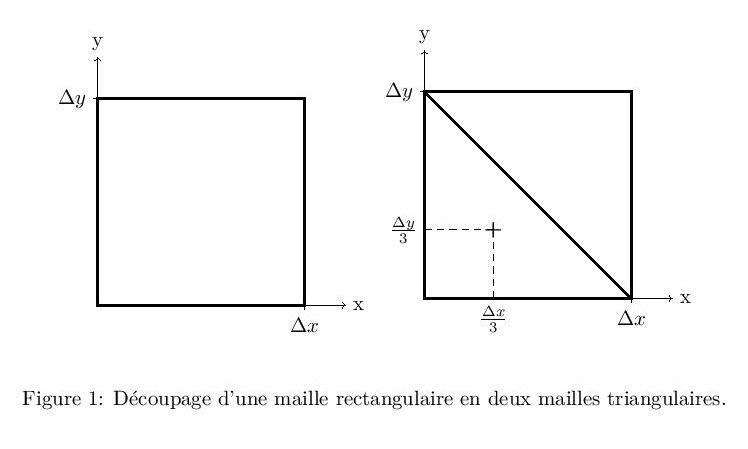

In [ ]:

def quadrature_2D(noeudsx,noeudsy):
     ##### à modifier
     return 0.